In [15]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
results = joblib.load('../../../../../4_evaluation/large/DRH/results.sav')['real']
results

{'No-Effect vs. Effect': {'cv_evaluation':     fit_time  score_time  test_balanced_accuracy  test_precision  test_recall  \
  0   4.230975    0.288979                0.635850        0.107759     0.657895   
  1   4.603231    0.280702                0.703211        0.142105     0.710526   
  2   3.700153    0.461471                0.655342        0.122449     0.631579   
  3   3.670661    0.514201                0.647639        0.114155     0.657895   
  4   3.725477    0.543573                0.678701        0.121212     0.736842   
  5   4.233418    0.275310                0.634819        0.110092     0.631579   
  6   3.739047    0.561775                0.601875        0.100962     0.552632   
  7   4.539691    0.287853                0.586852        0.095694     0.526316   
  8   4.968452    0.321917                0.673881        0.126214     0.684211   
  9   4.348876    0.564182                0.676758        0.123853     0.710526   
  10  4.324713    0.401667                0.59

No-Effect vs. Effect


X has feature names, but KNNImputer was fitted without feature names


No-Effect vs. Cyto


X has feature names, but KNNImputer was fitted without feature names


Cyto vs. Effect


X has feature names, but KNNImputer was fitted without feature names


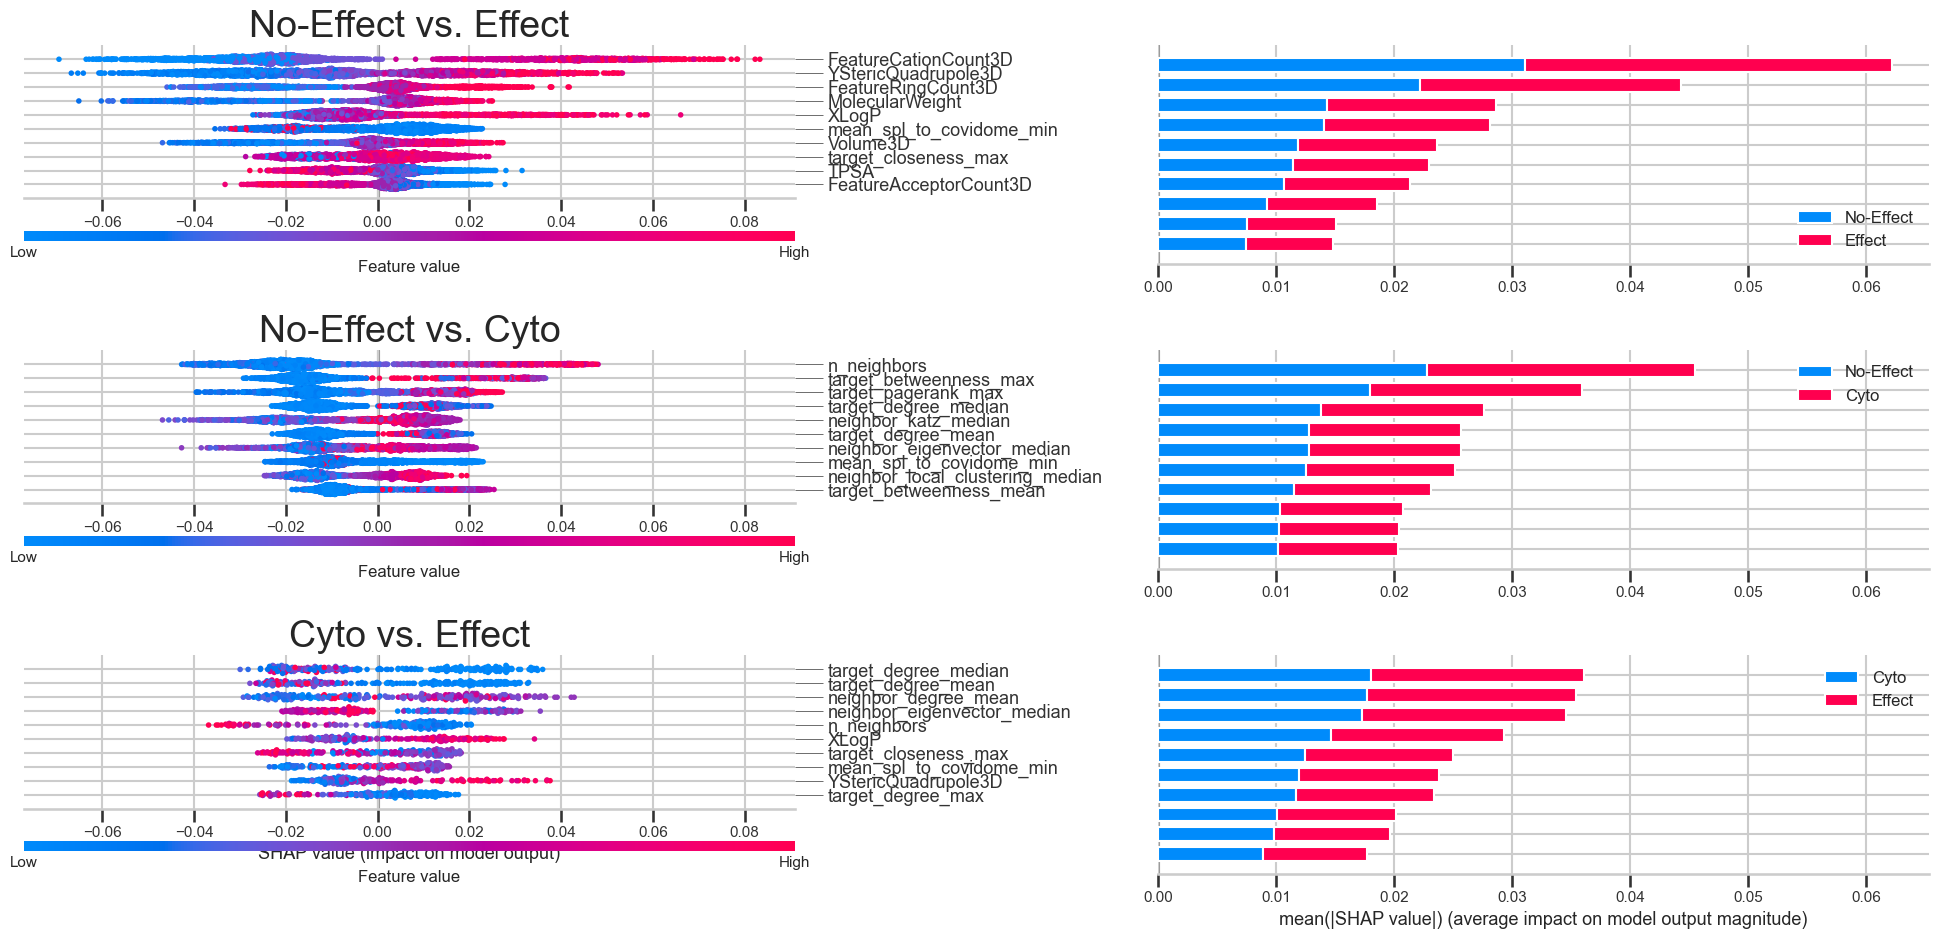

In [17]:
sns.set("talk", font_scale=1.5)
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(20, 10), dpi=100, sharey='row', sharex='col')
i = 0
for key in results.keys():
    print(key)
    labels = key.split(' vs. ')
    model = results[key]['model']
    X_train = results[key]['X_train']
    rf = model['clf']
    imputer = model['imputer']
    scaler = model['scaler']
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_train = pd.DataFrame(imputer.transform(X_train), index=X_train.index, columns=X_train.columns)
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(X_train)
    plt.sca(axes[i, 0])
    axes[i, 0].set(title=f'{labels[0]} vs. {labels[1]}')
    shap.summary_plot(shap_values[1], X_train, show=False, max_display=10, plot_size=None, class_names=labels)
    axes[i, 0].yaxis.tick_right()
    plt.tight_layout()
    plt.sca(axes[i, 1])
    shap.summary_plot(shap_values, X_train, show=False, max_display=10, plot_size=None, class_names=labels)
    plt.tight_layout()
    if i != 2:
        axes[i, 0].set(xlabel='')
        axes[i, 1].set(xlabel='')
    i += 1

fig.savefig('shap.png', format="png", dpi=300)
fig.savefig('shap.eps', format="eps", dpi=300)
fig.savefig('shap.pdf', format="pdf", dpi=300)
fig.savefig('shap.svg', format="svg", dpi=300)

No-Effect vs. Effect
Index(['MolecularWeight', 'XLogP', 'TPSA', 'Complexity', 'Charge',
       'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount',
       'HeavyAtomCount', 'AtomStereoCount', 'BondStereoCount',
       'CovalentUnitCount', 'Volume3D', 'XStericQuadrupole3D',
       'YStericQuadrupole3D', 'ZStericQuadrupole3D', 'FeatureCount3D',
       'FeatureAcceptorCount3D', 'FeatureDonorCount3D', 'FeatureAnionCount3D',
       'FeatureCationCount3D', 'FeatureRingCount3D',
       'FeatureHydrophobeCount3D', 'ConformerModelRMSD3D',
       'EffectiveRotorCount3D', 'ConformerCount3D', 'target_pagerank_min',
       'target_pagerank_mean', 'target_pagerank_median', 'target_pagerank_max',
       'neighbor_pagerank_min', 'neighbor_pagerank_mean',
       'neighbor_pagerank_median', 'neighbor_pagerank_max',
       'target_betweenness_min', 'target_betweenness_mean',
       'target_betweenness_median', 'target_betweenness_max',
       'neighbor_betweenness_min', 'neighbor_betweenness_me

X has feature names, but KNNImputer was fitted without feature names


No-Effect vs. Cyto
Index(['MolecularWeight', 'XLogP', 'TPSA', 'Complexity', 'Charge',
       'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount',
       'HeavyAtomCount', 'AtomStereoCount', 'BondStereoCount',
       'CovalentUnitCount', 'Volume3D', 'XStericQuadrupole3D',
       'YStericQuadrupole3D', 'ZStericQuadrupole3D', 'FeatureCount3D',
       'FeatureAcceptorCount3D', 'FeatureDonorCount3D', 'FeatureAnionCount3D',
       'FeatureCationCount3D', 'FeatureRingCount3D',
       'FeatureHydrophobeCount3D', 'ConformerModelRMSD3D',
       'EffectiveRotorCount3D', 'ConformerCount3D', 'target_pagerank_min',
       'target_pagerank_mean', 'target_pagerank_median', 'target_pagerank_max',
       'neighbor_pagerank_min', 'neighbor_pagerank_mean',
       'neighbor_pagerank_median', 'neighbor_pagerank_max',
       'target_betweenness_min', 'target_betweenness_mean',
       'target_betweenness_median', 'target_betweenness_max',
       'neighbor_betweenness_min', 'neighbor_betweenness_mean

X has feature names, but KNNImputer was fitted without feature names


Cyto vs. Effect
Index(['MolecularWeight', 'XLogP', 'TPSA', 'Complexity', 'Charge',
       'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount',
       'HeavyAtomCount', 'AtomStereoCount', 'BondStereoCount',
       'CovalentUnitCount', 'Volume3D', 'XStericQuadrupole3D',
       'YStericQuadrupole3D', 'ZStericQuadrupole3D', 'FeatureCount3D',
       'FeatureAcceptorCount3D', 'FeatureDonorCount3D', 'FeatureAnionCount3D',
       'FeatureCationCount3D', 'FeatureRingCount3D',
       'FeatureHydrophobeCount3D', 'ConformerModelRMSD3D',
       'EffectiveRotorCount3D', 'ConformerCount3D', 'target_pagerank_min',
       'target_pagerank_mean', 'target_pagerank_median', 'target_pagerank_max',
       'neighbor_pagerank_min', 'neighbor_pagerank_mean',
       'neighbor_pagerank_median', 'neighbor_pagerank_max',
       'target_betweenness_min', 'target_betweenness_mean',
       'target_betweenness_median', 'target_betweenness_max',
       'neighbor_betweenness_min', 'neighbor_betweenness_mean',


X has feature names, but KNNImputer was fitted without feature names


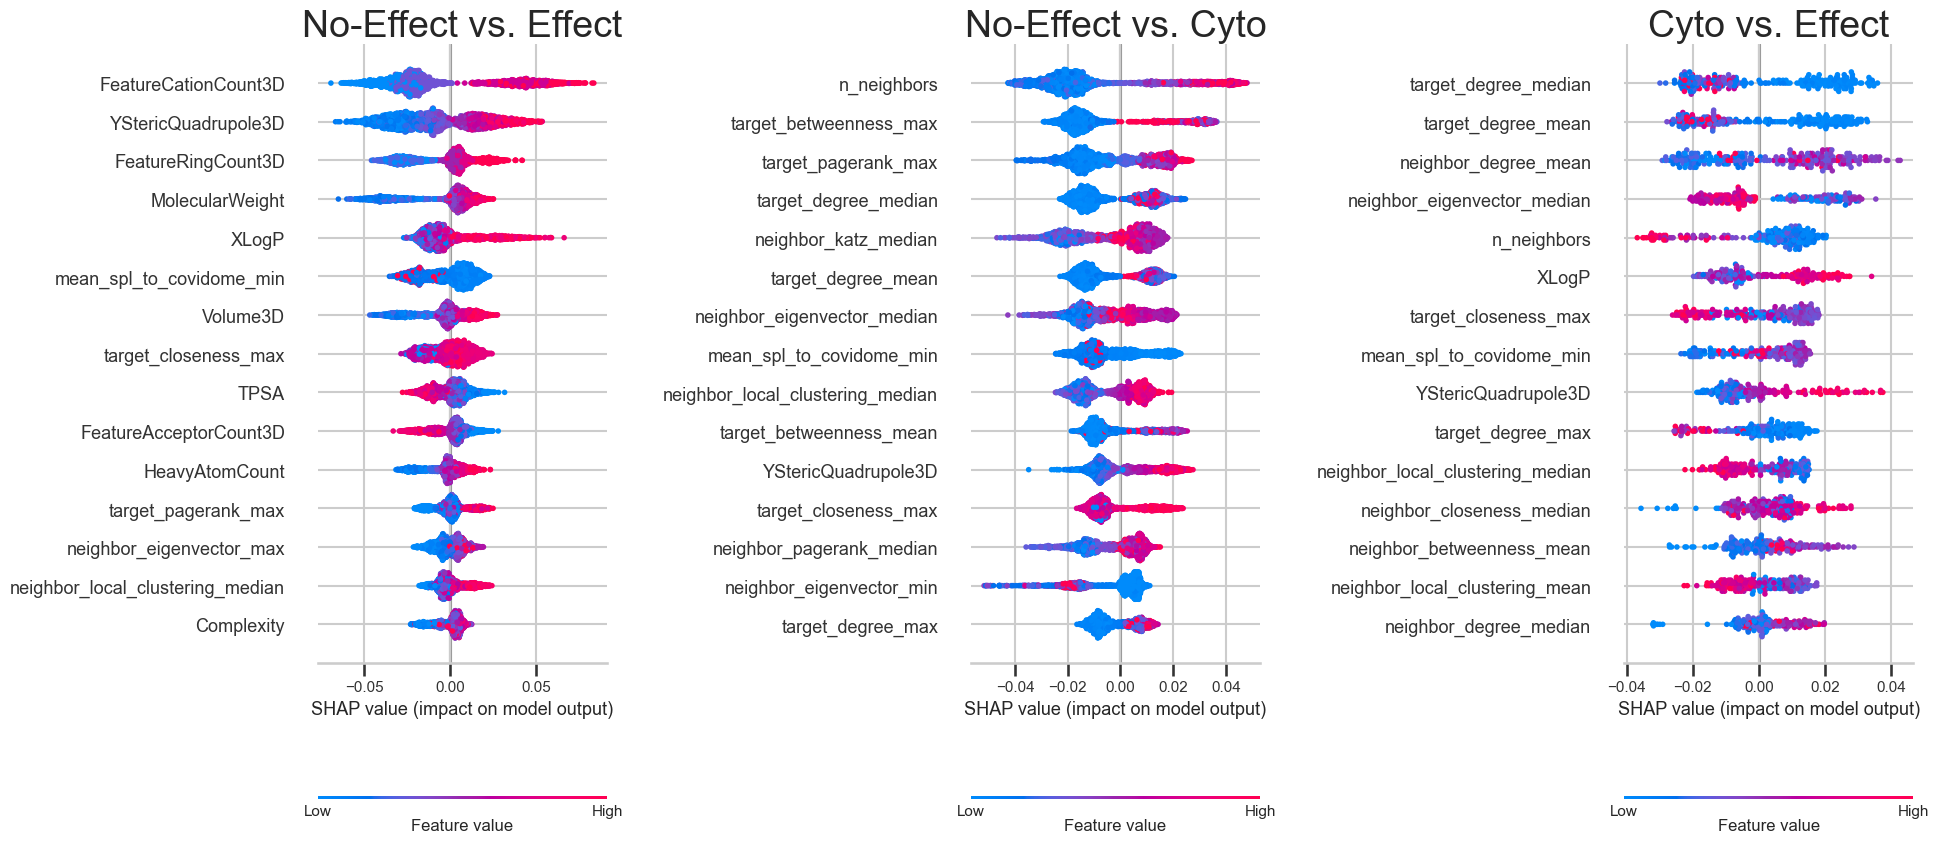

In [18]:
sns.set("talk", font_scale=1.5)
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 10), dpi=100)
i = 0
for key in results.keys():
    print(key)
    labels = key.split(' vs. ')
    model = results[key]['model']
    X_train = results[key]['X_train']
    print(X_train.columns)
    rf = model['clf']
    imputer = model['imputer']
    scaler = model['scaler']
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_train = pd.DataFrame(imputer.transform(X_train), index=X_train.index, columns=X_train.columns)
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(X_train)
    plt.sca(axes[i])
    axes[i].set(title=f'{labels[0]} vs. {labels[1]}')
    shap.summary_plot(shap_values[1], X_train, show=False, max_display=15, plot_size=None, class_names=labels)

    plt.tight_layout()
    #plt.sca(axes[i, 1])
    #shap.summary_plot(shap_values, X_train, show=False, max_display=10, plot_size=None, class_names=labels)
    #plt.tight_layout()
    #if i != 2:
    #    axes[i, 0].set(xlabel='')
    #    axes[i, 1].set(xlabel='')
    i += 1

fig.savefig('shap_horizontal.png', format="png", dpi=300)
fig.savefig('shap_horizontal.eps', format="eps", dpi=300)
fig.savefig('shap_horizontal.pdf', format="pdf", dpi=300)
fig.savefig('shap_horizontal.svg', format="svg", dpi=300)

(300, 95)